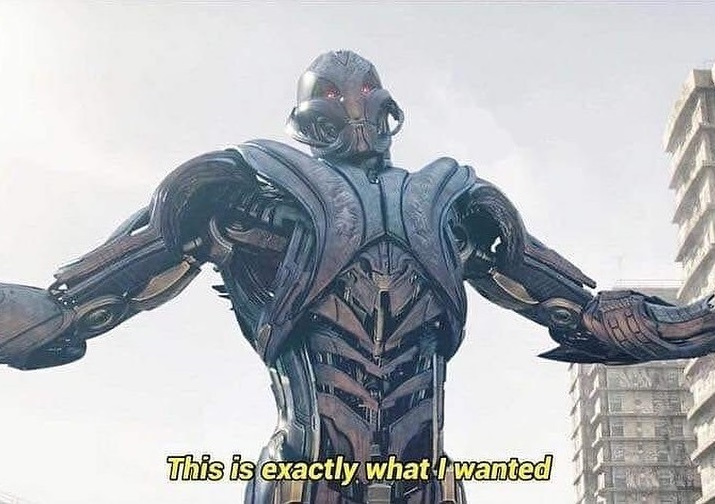
# 🚩 Reviewer's Final Comment:
* Amazing work. You project is the perfect one.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [ ]:
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Step 1: Loading the dataset

In [ ]:
training_df = pd.read_csv('/content/twitter_training.csv')
validation_df = pd.read_csv('/content/twitter_validation.csv')

##Step 2: Data Preprocessing

In [ ]:
def clean_tweet(tweet):
    tweet = str(tweet).lower()  # Convert to string and lowercase
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'\@\w+|\#','', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)  # Remove punctuation and numbers
    tweet = tweet.strip()  # Remove extra spaces
    return tweet

In [ ]:
training_df.columns = training_df.columns.str.strip()
validation_df.columns = validation_df.columns.str.strip()

training_df['tweet'] = training_df['tweet'].fillna('')  # Fill NaN with empty strings
validation_df['tweet'] = validation_df['tweet'].fillna('')  # Doing the same for the validation set

training_df['cleaned_tweet'] = training_df['tweet'].apply(clean_tweet)
validation_df['cleaned_tweet'] = validation_df['tweet'].apply(clean_tweet)

##Step 3: Tokenization

In [ ]:
stop_words = set(stopwords.words('english'))

def tokenize_tweet(tweet):
    tokens = word_tokenize(tweet)
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

training_df['tokenized_tweet'] = training_df['cleaned_tweet'].apply(tokenize_tweet)
validation_df['tokenized_tweet'] = validation_df['cleaned_tweet'].apply(tokenize_tweet)

##Step 4: TF-IDF Vectorization

In [ ]:
training_df['joined_tweet'] = training_df['tokenized_tweet'].apply(lambda x: ' '.join(x))
validation_df['joined_tweet'] = validation_df['tokenized_tweet'].apply(lambda x: ' '.join(x))

In [ ]:
# Reducing the number of features for TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Reducing features to 5000
# 🚩 Reviewer's Comment: You should specify the max_features carefully. This should vary depending on different dataset. For this case, it should be 10k or 20k.

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(training_df['joined_tweet'])
X_val_tfidf = tfidf_vectorizer.transform(validation_df['joined_tweet'])

In [ ]:
y_train = training_df['tweet_sentiment']
y_val = validation_df['tweet_sentiment']

##Step 5, 7 and 8: Model training and testing with twitter_validation.csv and evaluating model accuracy

In [ ]:
#LinearSVC model
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train_tfidf, y_train)
linear_svc_pred = linear_svc_model.predict(X_val_tfidf)
linear_svc_accuracy = accuracy_score(y_val, linear_svc_pred)
print(f'LinearSVC Model Accuracy: {linear_svc_accuracy}')


LinearSVC Model Accuracy: 0.826


In [ ]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)
decision_tree_pred = decision_tree_model.predict(X_val_tfidf)
decision_tree_accuracy = accuracy_score(y_val, decision_tree_pred)
print(f'Decision Tree Accuracy: {decision_tree_accuracy}')

Decision Tree Accuracy: 0.923


In [ ]:
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_tfidf, y_train)
random_forest_pred = random_forest_model.predict(X_val_tfidf)
random_forest_accuracy = accuracy_score(y_val, random_forest_pred)
print(f'Random Forest Accuracy: {random_forest_accuracy}')

Random Forest Accuracy: 0.957


In [ ]:
# Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)
naive_bayes_pred = naive_bayes_model.predict(X_val_tfidf)
naive_bayes_accuracy = accuracy_score(y_val, naive_bayes_pred)
print(f'Naive Bayes Accuracy: {naive_bayes_accuracy}')

Naive Bayes Accuracy: 0.712


##Step 6, 7 and 8: Hyperparameter Tuning and testing with twitter_validation.csv and evaluating model accuracy

In [ ]:
# Hyperparameter Tuning with SVM using RandomSearchCV
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 5000],
    'penalty': ['l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [False, True]
}

In [ ]:
random_search_svm = RandomizedSearchCV(linear_svc_model, param_grid_svm, n_iter=10, cv=3, verbose=2)
random_search_svm.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=100, dual=False, loss=hinge, max_iter=2000, penalty=l2; total time=   0.1s
[CV] END C=100, dual=False, loss=hinge, max_iter=2000, penalty=l2; total time=   0.1s
[CV] END C=100, dual=False, loss=hinge, max_iter=2000, penalty=l2; total time=   0.1s
[CV] END C=0.1, dual=True, loss=squared_hinge, max_iter=2000, penalty=l2; total time=   0.5s
[CV] END C=0.1, dual=True, loss=squared_hinge, max_iter=2000, penalty=l2; total time=   0.5s
[CV] END C=0.1, dual=True, loss=squared_hinge, max_iter=2000, penalty=l2; total time=   0.4s
[CV] END C=0.01, dual=False, loss=hinge, max_iter=5000, penalty=l2; total time=   0.1s
[CV] END C=0.01, dual=False, loss=hinge, max_iter=5000, penalty=l2; total time=   0.1s
[CV] END C=0.01, dual=False, loss=hinge, max_iter=5000, penalty=l2; total time=   0.1s
[CV] END C=0.1, dual=False, loss=hinge, max_iter=2000, penalty=l2; total time=   0.1s
[CV] END C=0.1, dual=False, loss=hinge, max_iter=2000, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=0.1, dual=True, loss=hinge, max_iter=1000, penalty=l2; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100, dual=True, loss=hinge, max_iter=1000, penalty=l2; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100, dual=True, loss=hinge, max_iter=1000, penalty=l2; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100, dual=True, loss=hinge, max_iter=1000, penalty=l2; total time=   8.3s
[CV] END C=0.1, dual=True, loss=squared_hinge, max_iter=5000, penalty=l2; total time=   0.4s
[CV] END C=0.1, dual=True, loss=squared_hinge, max_iter=5000, penalty=l2; total time=   0.5s
[CV] END C=0.1, dual=True, loss=squared_hinge, max_iter=5000, penalty=l2; total time=   0.4s
[CV] END C=0.1, dual=False, loss=squared_hinge, max_iter=5000, penalty=l2; total time=   0.8s
[CV] END C=0.1, dual=False, loss=squared_hinge, max_iter=5000, penalty=l2; total time=   0.9s
[CV] END C=0.1, dual=False, loss=squared_hinge, max_iter=5000, penalty=l2; total time=   0.9s
[CV] END C=10, dual=False, loss=squared_hinge, max_iter=1000, penalty=l2; total time=   2.4s
[CV] END C=10, dual=False, loss=squared_hinge, max_iter=1000, penalty=l2; total time=   2.0s
[CV] END C=10, dual=False, loss=squared_hinge, max_iter=1000, penalty=l2; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 317, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3

RandomizedSearchCV(cv=3, estimator=LinearSVC(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'dual': [False, True],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'max_iter': [1000, 2000, 5000],
                                        'penalty': ['l2']},
                   verbose=2)

In [ ]:
# Finding the best parameters for the model
print(f"Best Parameters: {random_search_svm.best_params_}")
svm_best_pred = random_search_svm.predict(X_val_tfidf)
svm_best_accuracy = accuracy_score(y_val, svm_best_pred)
print(f'SVM Best Model Accuracy: {svm_best_accuracy}')

Best Parameters: {'penalty': 'l2', 'max_iter': 1000, 'loss': 'hinge', 'dual': True, 'C': 0.1}
SVM Best Model Accuracy: 0.706


In [ ]:
# Hyperparameter Tuning with Decision Tree using RandomSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [10, 50, None],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20]  # Minimum samples required to split an internal node
}

In [ ]:
random_search_dt = RandomizedSearchCV(decision_tree_model, param_grid_dt, n_iter=10, cv=3, verbose=2)
random_search_dt.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=entropy, max_depth=10, min_samples_split=20; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20; total time=   1.2s
[CV] END criterion=entropy, max_depth=10, min_samples_split=2; total time=   1.7s
[CV] END criterion=entropy, max_depth=10, min_samples_split=2; total time=   1.5s
[CV] END criterion=entropy, max_depth=10, min_samples_split=2; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=10; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=  11.9s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=  11.9s
[CV] END criterion=gini, max_de

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 50, None],
                                        'min_samples_split': [2, 10, 20]},
                   verbose=2)

In [ ]:
# Finding the best parameters for the model
print(f"Best Parameters: {random_search_dt.best_params_}")
dt_best_pred = random_search_dt.predict(X_val_tfidf)
dt_best_accuracy = accuracy_score(y_val, dt_best_pred)
print(f'Decision Tree Best Model Accuracy: {dt_best_accuracy}')

Best Parameters: {'min_samples_split': 20, 'max_depth': None, 'criterion': 'gini'}
Decision Tree Best Model Accuracy: 0.909


In [ ]:
# Hyperparameter Tuning with Random Forest using RandomSearchCV
param_grid_rf = {
    'n_estimators': [10, 50, 100],  # Number of trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider for best split
    'max_depth': [10, 50, None],  # Maximum depth of the trees
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

In [ ]:
random_search_rf = RandomizedSearchCV(random_forest_model, param_grid_rf, n_iter=10, cv=3, verbose=2)
random_search_rf.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=50; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=50; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=50; total time=   2.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, n_estimators=100; total time=  26.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, n_estimators=100; total time=  26.7s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, n_estimators=100; total time=  28.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10; total time=  13.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10; total time=  13.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10; total time=  14.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, n_estimators=100;

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 50, 100]},
                   verbose=2)

In [ ]:
# Finding the best parameters for the model
print(f"Best Parameters: {random_search_rf.best_params_}")
rf_best_pred = random_search_rf.predict(X_val_tfidf)
rf_best_accuracy = accuracy_score(y_val, rf_best_pred)
print(f'Random Forest Best Model Accuracy: {rf_best_accuracy}')

Best Parameters: {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Random Forest Best Model Accuracy: 0.764


In [ ]:
# Hyperparameter Tuning with Multinomial Navie Bayes using RandomSearchCV
param_grid_mnb = {
    'alpha': [0.1, 0.5, 1.0],  # Additive smoothing parameter
}

In [ ]:
random_search_mnb = RandomizedSearchCV(naive_bayes_model, param_grid_mnb, n_iter=10, cv=3, verbose=2)
random_search_mnb.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..........................................alpha=0.1; total time=   0.3s
[CV] END ..........................................alpha=0.1; total time=   0.3s
[CV] END ..........................................alpha=0.1; total time=   0.3s
[CV] END ..........................................alpha=0.5; total time=   0.3s
[CV] END ..........................................alpha=0.5; total time=   0.3s
[CV] END ..........................................alpha=0.5; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.2s
[CV] END ..........................................alpha=1.0; total time=   0.2s


RandomizedSearchCV(cv=3, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.1, 0.5, 1.0]}, verbose=2)

In [ ]:

# Finding the best parameters for the model
print(f"Best Parameters: {random_search_mnb.best_params_}")
mnb_best_pred = random_search_mnb.predict(X_val_tfidf)
mnb_best_accuracy = accuracy_score(y_val, mnb_best_pred)
print(f'Multinomial Naive Bayes Best Model Accuracy: {mnb_best_accuracy}')

Best Parameters: {'alpha': 1.0}
Multinomial Naive Bayes Best Model Accuracy: 0.712


##Step 8: Visualizing the evaluation

###Before hyperparameter tuning

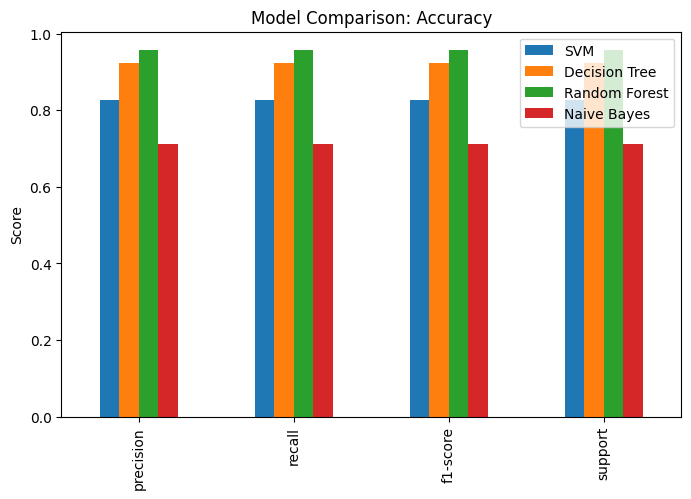

In [ ]:
report_svc = classification_report(y_val, linear_svc_pred, output_dict=True)
report_dt = classification_report(y_val, decision_tree_pred, output_dict=True)
report_rf = classification_report(y_val, random_forest_pred, output_dict=True)
report_nb = classification_report(y_val, naive_bayes_pred, output_dict=True)

# Converting to DataFrame for easier plotting
df_svc = pd.DataFrame(report_svc).transpose()
df_dt = pd.DataFrame(report_dt).transpose()
df_rf = pd.DataFrame(report_rf).transpose()
df_nb = pd.DataFrame(report_nb).transpose()

# Combining the scores of all models for easy comparison
scores = pd.DataFrame({
    'SVM': df_svc.loc['accuracy'],
    'Decision Tree': df_dt.loc['accuracy'],
    'Random Forest': df_rf.loc['accuracy'],
    'Naive Bayes': df_nb.loc['accuracy'],
})

# Plotting the accuracy scores
scores.plot(kind='bar', figsize=(8, 5))
plt.title('Model Comparison: Accuracy')
plt.ylabel('Score')
plt.show()


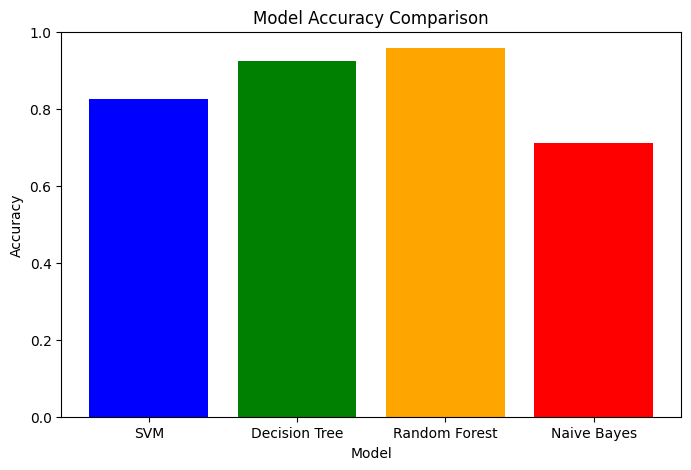

In [ ]:
# Accuracy of each model
accuracies = {
    'SVM': linear_svc_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'Naive Bayes': naive_bayes_accuracy
}

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1
plt.show()


###After hyperparameter tuning

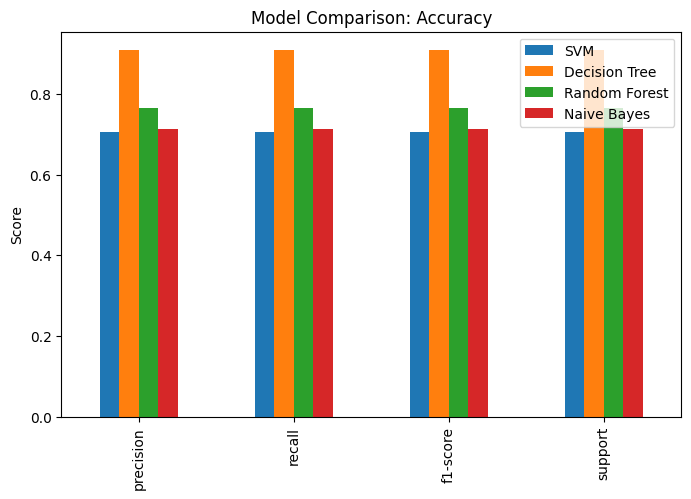

In [ ]:
report_svc_tuned = classification_report(y_val, svm_best_pred, output_dict=True)
report_dt_tuned = classification_report(y_val, dt_best_pred, output_dict=True)
report_rf_tuned = classification_report(y_val, rf_best_pred, output_dict=True)
report_nb_tuned = classification_report(y_val, mnb_best_pred, output_dict=True)

# Converting to DataFrame for easier plotting
df_svc_tuned = pd.DataFrame(report_svc_tuned).transpose()
df_dt_tuned = pd.DataFrame(report_dt_tuned).transpose()
df_rf_tuned = pd.DataFrame(report_rf_tuned).transpose()
df_nb_tuned = pd.DataFrame(report_nb_tuned).transpose()

# Combining the scores of all models for easy comparison
scores_tuned = pd.DataFrame({
    'SVM': df_svc_tuned.loc['accuracy'],
    'Decision Tree': df_dt_tuned.loc['accuracy'],
    'Random Forest': df_rf_tuned.loc['accuracy'],
    'Naive Bayes': df_nb_tuned.loc['accuracy'],
})

# Plotting the accuracy scores
scores_tuned.plot(kind='bar', figsize=(8, 5))
plt.title('Model Comparison: Accuracy')
plt.ylabel('Score')
plt.show()


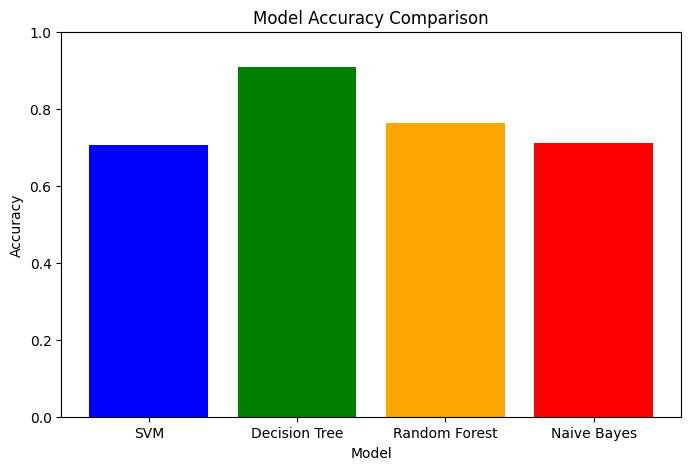

In [ ]:
# Accuracy of each model
accuracies = {
    'SVM': svm_best_accuracy,
    'Decision Tree': dt_best_accuracy,
    'Random Forest': rf_best_accuracy,
    'Naive Bayes': mnb_best_accuracy
}

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1
plt.show()

###Step 10 (Suggesting Best Algorithm): By comparing all the algorithms, RandomForestClassifier is the best algorithm for this model. It took less time to execute and also gave the best accuracy before and after hyperparameter tuning.